<a href="https://colab.research.google.com/github/team-epoch/EPOCH_4th_TASK/blob/main/4th_TASK/DevelopTeam/Practice/week3/4%EA%B8%B0_%EC%9D%B4%EC%A7%80%EC%9C%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 07 나이브 베이즈
> 스팸 여부 판단하기

✅ **나이브 베이즈**
> 베이즈 정리를 적용한 조건부 확률 기반의 분류 모델

> 딥러닝보다 간단한 방법으로 자연어 처리를 원할 때 유용

> 범주형 형태의 변수가 많을 때 적합, 숫자형 변수가 많을 때는 적합하지 않음

👍🏻 **장점**
* 비교적 간단한 알고리즘으로 속도 또한 빠름
* 작은 훈련셋으로도 잘 예측

👎🏻 **단점**
* 모든 독립변수가 각각 독립적임을 전제로 함
* 실제 데이터에서 그런 경우가 많지 않기 때문에 단점이 되기도 함



## 7.2 라이브러리 및 데이터 불러오기 & 데이터 확인

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/spam.csv'
data = pd.read_csv(file_url) # 데이터셋 읽기

In [2]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data['target'].unique() # 목표 변수의 고윳값 확인

array(['ham', 'spam'], dtype=object)

## 7.3 전처리 : 특수 기호 제거하기

단어 처리 시 특수 기호는 노이즈가 되므로 제거해야 함

In [5]:
import string # 특수 기호 목록 출력을 위한 임포트

In [6]:
string.punctuation # 특수 기호 목록 출력

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

1️⃣ 문자열에서 문자를 하나씩 꺼내 특수 기호가 아닌 문자들만 리스트에 저장

2️⃣ 각 문자를 문장으로 합침

3️⃣ 문장별로 행에 저장되게 변환

In [8]:
# 1️⃣
sample_string = data['text'].loc[0] # 문자열 선택
sample_string

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [9]:
for i in sample_string: # 문자열의 문자를 하나씩 출력
  print(i)

G
o
 
u
n
t
i
l
 
j
u
r
o
n
g
 
p
o
i
n
t
,
 
c
r
a
z
y
.
.
 
A
v
a
i
l
a
b
l
e
 
o
n
l
y
 
i
n
 
b
u
g
i
s
 
n
 
g
r
e
a
t
 
w
o
r
l
d
 
l
a
 
e
 
b
u
f
f
e
t
.
.
.
 
C
i
n
e
 
t
h
e
r
e
 
g
o
t
 
a
m
o
r
e
 
w
a
t
.
.
.


In [11]:
for i in sample_string: # 문자열의 문자를 하나씩 출력
    if i not in string.punctuation: # 특수 기호가 아니면
        print(i)

G
o
 
u
n
t
i
l
 
j
u
r
o
n
g
 
p
o
i
n
t
 
c
r
a
z
y
 
A
v
a
i
l
a
b
l
e
 
o
n
l
y
 
i
n
 
b
u
g
i
s
 
n
 
g
r
e
a
t
 
w
o
r
l
d
 
l
a
 
e
 
b
u
f
f
e
t
 
C
i
n
e
 
t
h
e
r
e
 
g
o
t
 
a
m
o
r
e
 
w
a
t


✅ `in` 살펴보기
```
'a' in 'apple' # 문자열에 'a'가 있는지 확인
```
True
```
'b' in 'apple' # 문자열에 'b'가 있는지 확인
```
False

In [13]:
new_string = [] # 빈 리스트 생성
for i in sample_string: # 문자열 순회
    if i not in string.punctuation: # 특수 기호가 아니면
        new_string.append(i)       # 리스트에 문자 추가

In [14]:
new_string

['G',
 'o',
 ' ',
 'u',
 'n',
 't',
 'i',
 'l',
 ' ',
 'j',
 'u',
 'r',
 'o',
 'n',
 'g',
 ' ',
 'p',
 'o',
 'i',
 'n',
 't',
 ' ',
 'c',
 'r',
 'a',
 'z',
 'y',
 ' ',
 'A',
 'v',
 'a',
 'i',
 'l',
 'a',
 'b',
 'l',
 'e',
 ' ',
 'o',
 'n',
 'l',
 'y',
 ' ',
 'i',
 'n',
 ' ',
 'b',
 'u',
 'g',
 'i',
 's',
 ' ',
 'n',
 ' ',
 'g',
 'r',
 'e',
 'a',
 't',
 ' ',
 'w',
 'o',
 'r',
 'l',
 'd',
 ' ',
 'l',
 'a',
 ' ',
 'e',
 ' ',
 'b',
 'u',
 'f',
 'f',
 'e',
 't',
 ' ',
 'C',
 'i',
 'n',
 'e',
 ' ',
 't',
 'h',
 'e',
 'r',
 'e',
 ' ',
 'g',
 'o',
 't',
 ' ',
 'a',
 'm',
 'o',
 'r',
 'e',
 ' ',
 'w',
 'a',
 't']

In [15]:
new_string = [] # 빈 리스트 생성
for i in sample_string: # 문자열 순회
    if i not in string.punctuation: # 특수 기호가 아니면
        new_string.append(i)        # 리스트에 문자 추가
new_string = ''.join(new_string)    # 리스트를 문자열 형태로 변환

In [22]:
def remove_punc(x): # 함수 정의
    new_string = [] # 빈 리스트 생성
    for i in x: # 문자열 순회
        if i not in string.punctuation: # 특수 기호가 아니면
            new_string.append(i)        # 리스트에 문자 추가
    new_string = ''.join(new_string)    # 리스트를 문자열 형태로 변환
    return new_string                   # 반환

In [23]:
remove_punc(sample_string) # 특수 기호 삭제 함수 호출

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [25]:
remove_punc(data['text']) # 특수 기호 삭제 함수 호출

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...Ok lar... Joking wif u oni...Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'sU dun say so early hor... U c already then say...Nah I don\'t think he goes to usf, he lives around here thoughFreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcvEven my brother is not like to speak with me. They treat me like aids patent.As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends CallertuneWINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.Had your mobile 11 months or more? U R entitl

*`remove_punc()` 함수가 한 줄의 문자열에만 작동하도록 설계되어 있음 ➡️ `apply()` 함수를 사용해 df의 한 줄 한 줄 따로 함수에 적용*

In [26]:
data['text'].apply(remove_punc) # 함수에 한 행씩 적용되도록 실행

,text
0,Go until jurong point crazy Available only in ...
1,Ok lar Joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor U c already then say
4,Nah I dont think he goes to usf he lives aroun...
...,...
5569,This is the 2nd time we have tried 2 contact u...
5570,Will ü b going to esplanade fr home
5571,Pity was in mood for that Soany other suggest...
5572,The guy did some bitching but I acted like id ...


In [27]:
data['text'] = data['text'].apply(remove_punc) # 데이터셋 업데이트

## 7.4 전처리 : 불용어 제거하기

✅ **불용어**
> 자연어 분석에 큰 도움이 안 되는 단어

> 분석의 목적에 따라 불용어는 달라질 수 있음

1️⃣ 판다스 시리즈에 저장된 문자열 하나를 단어 단위로 리스트 변환

2️⃣ 불용어가 아니면 소문자로 저장

3️⃣ 문자를 문자열로 합침

4️⃣ 이 과정을 반복하며 모든 문자열에 적용

In [28]:
import nltk # 임포트
nltk.download('stopwords') # 불용어 목록 가져오기

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
from nltk.corpus import stopwords # 불용어 목록 임포트

In [31]:
stopwords.words('english') # 영어 불용어 선택

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

*한국어 불용어는 www.ranks.nl 등에서 받을 수 있다함*

In [33]:
from nltk.corpus import stopwords
print(stopwords.fileids()) # 제공되는 언어(24개)

['albanian', 'arabic', 'azerbaijani', 'basque', 'belarusian', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'tamil', 'turkish']


In [34]:
sample_string = data['text'].loc[0]
sample_string.split() # 단어 단위로 문장 분할(띄어쓰기 기준)

['Go',
 'until',
 'jurong',
 'point',
 'crazy',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'Cine',
 'there',
 'got',
 'amore',
 'wat']

In [35]:
for i in sample_string.split(): # 순회
    if i not in stopwords.words('english'): # 불용어가 아니면
        print(i) # 출력

Go
jurong
point
crazy
Available
bugis
n
great
world
la
e
buffet
Cine
got
amore
wat


stopwords에 들어 있는 단어들은 모두 소문자이기 때문에 모두 소문자로 변환 필요

In [36]:
for i in sample_string.split(): # 순회
    if i.lower() not in stopwords.words('english'): # 불용어가 아니면 소문자로 변환
        print(i.lower()) # 소문자로 출력

go
jurong
point
crazy
available
bugis
n
great
world
la
e
buffet
cine
got
amore
wat


In [37]:
# 다시 문장으로 합치기
new_string = [] # 빈 리스트 생성
for i in sample_string.split(): # 순회
    if i.lower() not in stopwords.words('english'):
    # 소문자로 변환한 단어가 불용어가 아니면
        new_string.append(i.lower()) # 문자 단위로 추가

new_string = ' '.join(new_string)    # 공백 단위로 묶기

new_string

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [38]:
def stop_words(x):
  new_string = []     # 새 리스트 생성
  for i in x.split(): # 순회
      if i.lower() not in stopwords.words('english'):
      # 소문자로 변환한 단어가 불용어가 아니면
          new_string.append(i.lower()) # 문자 단위로 추가
  new_string = ' '.join(new_string)    # 공백 단위로 묶기
  return new_string # 반환

data['text'] = data['text'].apply(stop_words) # 텍스트에 stop_words 함수 적용
data['text']

,text
0,go jurong point crazy available bugis n great ...
1,ok lar joking wif u oni
2,free entry 2 wkly comp win fa cup final tkts 2...
3,u dun say early hor u c already say
4,nah dont think goes usf lives around though
...,...
5569,2nd time tried 2 contact u u £750 pound prize ...
5570,ü b going esplanade fr home
5571,pity mood soany suggestions
5572,guy bitching acted like id interested buying s...


## 7.5 전처리 : 목표 컬럼 형태 변경하기

In [39]:
data['target'] = data['target'].map({'spam':1, 'ham':0}) # 텍스트를 숫자로 변환
data['target'] # 출력

,target
0,0
1,0
2,1
3,0
4,0
...,...
5569,1
5570,0
5571,0
5572,0


## 7.6 전처리 : 카운트 기반으로 벡터화하기
> 데이터에 존재하는 모든 단어들을 사전처럼 모은 뒤에 인덱스를 부여하고, 문장마다 속한 단어가 있는 인덱스를 카운트

In [40]:
x = data['text']   # 독립변수
y = data['target'] # 종속변수

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
cv = CountVectorizer() # 객체 생성
cv.fit(x)      # 학습하기
cv.vocabulary_ # 단어와 인덱스 출력

{'go': 3791,
 'jurong': 4687,
 'point': 6433,
 'crazy': 2497,
 'available': 1414,
 'bugis': 1881,
 'great': 3888,
 'world': 9184,
 'la': 4847,
 'buffet': 1879,
 'cine': 2214,
 'got': 3848,
 'amore': 1181,
 'wat': 8947,
 'ok': 5995,
 'lar': 4886,
 'joking': 4655,
 'wif': 9079,
 'oni': 6027,
 'free': 3577,
 'entry': 3160,
 'wkly': 9136,
 'comp': 2330,
 'win': 9093,
 'fa': 3296,
 'cup': 2553,
 'final': 3421,
 'tkts': 8380,
 '21st': 454,
 'may': 5335,
 '2005': 441,
 'text': 8217,
 '87121': 875,
 'receive': 6833,
 'questionstd': 6724,
 'txt': 8592,
 'ratetcs': 6776,
 'apply': 1267,
 '08452810075over18s': 71,
 'dun': 3011,
 'say': 7192,
 'early': 3031,
 'hor': 4222,
 'already': 1154,
 'nah': 5682,
 'dont': 2918,
 'think': 8291,
 'goes': 3805,
 'usf': 8741,
 'lives': 5050,
 'around': 1318,
 'though': 8310,
 'freemsg': 3585,
 'hey': 4118,
 'darling': 2617,
 'weeks': 9002,
 'word': 9170,
 'back': 1464,
 'id': 4343,
 'like': 5000,
 'fun': 3652,
 'still': 7860,
 'tb': 8147,
 'xxx': 9309,
 'std': 

In [43]:
x = cv.transform(x) # 트랜스폼
print(x) # 이 데이터는 print를 사용해야 아래와 같은 결과물이 보입니다

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 47493 stored elements and shape (5574, 9437)>
  Coords	Values
  (0, 1181)	1
  (0, 1414)	1
  (0, 1879)	1
  (0, 1881)	1
  (0, 2214)	1
  (0, 2497)	1
  (0, 3791)	1
  (0, 3848)	1
  (0, 3888)	1
  (0, 4687)	1
  (0, 4847)	1
  (0, 6433)	1
  (0, 8947)	1
  (0, 9184)	1
  (1, 4655)	1
  (1, 4886)	1
  (1, 5995)	1
  (1, 6027)	1
  (1, 9079)	1
  (2, 71)	1
  (2, 441)	1
  (2, 454)	1
  (2, 875)	1
  (2, 1267)	1
  (2, 2330)	1
  :	:
  (5570, 3188)	1
  (5570, 3564)	1
  (5570, 3810)	1
  (5570, 4188)	1
  (5571, 5566)	1
  (5571, 6359)	1
  (5571, 7611)	1
  (5571, 7986)	1
  (5572, 999)	1
  (5572, 1665)	1
  (5572, 1916)	1
  (5572, 3103)	1
  (5572, 3577)	1
  (5572, 3701)	1
  (5572, 3950)	1
  (5572, 4343)	1
  (5572, 4480)	1
  (5572, 5000)	1
  (5572, 5777)	1
  (5572, 7636)	1
  (5572, 8731)	1
  (5572, 8997)	1
  (5573, 5688)	1
  (5573, 7052)	1
  (5573, 8538)	1


(데이터 행 번호, 단어의 인덱스 값)  행에서 출현 횟수

In [44]:
data.loc[0]['text'] # 0번째 행의 'text' 열의 값 선택

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [45]:
print(cv.vocabulary_['go'])      # 인덱스 출력
print(cv.vocabulary_['jurong'])  # 인덱스 출력
print(cv.vocabulary_['point'])   # 인덱스 출력

3791
4687
6433


## 7.7 모델링 및 예측/평가하기

In [46]:
from sklearn.model_selection import train_test_split # 임포트
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100) # 학습셋, 시험셋 분할

✅ **MultinominalNB 모듈**
> 다항 분포에 대한 Naive Bayes 알고리즘

> 다항 분포(Multinomial) 외에 정규분포(Gaussian), 베르누이 분포(Bernoulli)에 따른 NB 모듈이 있으며, 데이터 분포의 특성을 명확히 파악하기 어렵다면 이 세 가지 모듈을 모두 사용하여 가장 결과가 좋은 모델을 선택하면 됨

In [47]:
from sklearn.naive_bayes import MultinomialNB

In [54]:
model = MultinomialNB()      # 모델 객체 생성
model.fit(x_train, y_train)  # 학습
pred = model.predict(x_test) # 예측

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 38430 stored elements and shape (4459, 9437)>

✅ **confusion_matrix 모듈**
> 행을 실젯값 0과 1, 열을 예측값 0과 1로 두어 2 x 2 매트릭스를 만듦

> 이를 통해 실젯값이 0인데 예측값도 0인 경우, 실젯값은 0인데 예측값은 1인 경우, 실젯값도 1이고 예측값도 1인 경우, 실젯값은 1이나 예측값은 0인 4가지 경우를 한눈에 파악할 수 있음

`confusion_matrix(실젯값, 예측값)`

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [50]:
accuracy_score(y_test, pred) # 정확도 계산

0.9856502242152466

In [51]:
print(confusion_matrix(y_test, pred)) # 혼동 행렬 출력

[[965  12]
 [  4 134]]


<Axes: >

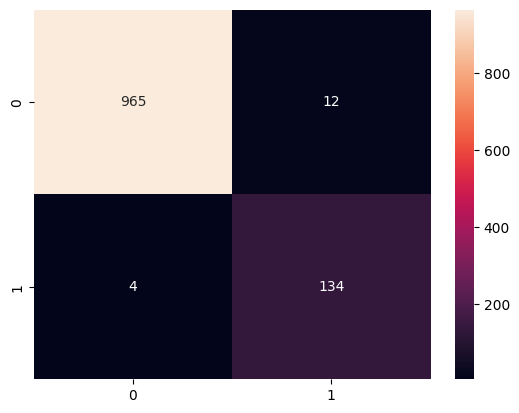

In [53]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.0f') # 혼동 행렬 히트맵 # '.0f' 소수점 없이

* **True Negative(TN)** : 음성을 음성으로 판단
* **False Positibe(PF)** : 음성을 양성으로 판단
* **False Negative(FN)** : 양성을 음성으로 판단
* **True Positive(TP)** : 양성을 양성으로 판단

---
* **Type 1 Error(1종 오류)** : 음성인 것을 양성으로 예측하는 오류 (False Positive, FP)
* **Type 2 Error(2종 오류)** : 양성인 것을 음석으로 예측하는 오류(False Negative, FN)

## 7.8 이해하기 : 나이브 베이즈 모델

$$
P(A|B) = \frac{P(B|A)P(A)}{P(B)}
$$

* $P(A|B)$ : 사후확률, 사건 A와 B가 있을 때, 사건 A가 발생한 상황에서 사건 B가 발생할 확률
* $P(A)$ : 사전확률, 사건 B와 상관없이 사건 A가 발생할 확률
* $P(B|A)$ : 가능도, A가 발생했을 때, B가 발생할 확률
* $P(B)$ : 전체에서 B가 발생할 확률

*e.g. 스팸 예제에서는 B라는 특정 단어가 등장했을 때 A가 스팸일 확률 $P(A|B)$를 구하고자 하는 것*

✅ **베이즈 정리**
> 두 확률 변수의 사전확률과 사후확률 사이의 관계를 나타내는 정리로, 사후확률을 구할 때 쓰임

## 🤔 Question

> Recall(재현율), 정밀도(Precision), F-1 Socre, AUC 등처럼 다양한 지표가 존재하는데, 언제 어떤 걸 쓰는 게 좋은거지?

> 나이브 베이즈 모델은 베이즈 정리를 기반으로 한 확률 모델인 것 같은데, 어떤 측면에서 NLP에 유용하게 쓰이는거지?

# Chapter 08 결정 트리
> 연봉 예측하기

* 연속형, 범주형 종속변수에 모두 사용 가능
* 모델링 결과를 시각화할 목적으로 가장 유용
* 아웃라이어가 문제될 정도로 많을 때 선형 모델보다 좋은 대안이 될 수 있음

👍🏻 **장점**
* 데이터에 대한 가정이 없는 모델 -> 자유롭게 적용할 수 있음
* 아웃라이어의 영향을 거의 받지 않음
* 트리 그래프를 통해서 직관적으로 이해하고 설명할 수 있음(시각화에 탁월)

👎🏻 **단점**
* 트리가 무한정 깊어지면 오버피팅 문제를 야기할 수 있음
* 앞으로 배울 발전된 트리 기반 모델들에 비하면 예측력이 상당히 떨어짐

## 8.2 라이브러리 및 데이터 불러오기, 데이터 확인하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/salary.csv'
data = pd.read_csv(file_url, skipinitialspace=True) # 데이터셋 읽기

`skipinitialspace` 데이터의 각 첫 자리에 있는 공란을 자동 제거

In [2]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


* `age` : 연령
* `workclass` : 고용 형태
* `education` : 학력
* `education-num` : 교육 연수
* `marital-status` : 혼인 상태
* `occupation` : 직업
* `relationship` : 가족 관계
* `race` : 인종
* `sex` : 성별
* `capital-gain` : 자산 증가
* `capital-loss` : 자산 감소
* `hours-per-week` : 주당 노동 시간
* `native-country` : 본국
* `class` : 연봉 구분

In [3]:
data['class'].unique()

array(['<=50K', '>50K'], dtype=object)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [5]:
data.describe() # 범주형 변수 자동 제외

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data.describe(include='all') # object형이 포함된 통계정보 출력

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
count,48842.000000,46043,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842
unique,NaN,8,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


## 8.3 전처리 : 범주형 데이터

### 8.3.1 object형의 변수 정보 확인하기

In [7]:
data['class'] = data['class'].map({'<=50K':0, '>50K':1})

In [8]:
data['age'].dtype

dtype('int64')

In [9]:
for i in data.columns:
  print(i, data[i].dtype) # 컬럼명과 데이터 타입 출력

age int64
workclass object
education object
education-num int64
marital-status object
occupation object
relationship object
race object
sex object
capital-gain int64
capital-loss int64
hours-per-week int64
native-country object
class int64


In [10]:
obj_list = []
for i in data.columns:
  if data[i].dtype == 'object':
    obj_list.append(i)

In [11]:
obj_list

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

### 8.3.2 전처리할 변수 선별하기

In [12]:
for i in obj_list:
  print(i, data[i].nunique())

workclass 8
education 16
marital-status 7
occupation 14
relationship 6
race 5
sex 2
native-country 41


In [13]:
# 고윳값이 10 이상인 컬럼만 출력
for i in obj_list:
  if data[i].nunique() >= 10:
    print(i, data[i].nunique())

education 16
occupation 14
native-country 41


### 8.3.3 education 변수 처리

In [14]:
data['education'].value_counts()

,count
education,
HS-grad,15784
Some-college,10878
Bachelors,8025
Masters,2657
Assoc-voc,2061
11th,1812
Assoc-acdm,1601
10th,1389
7th-8th,955


In [15]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0


`education-num` 변수가 `education` 정보를 숫자로 표현한 것 같음

In [16]:
np.sort(data['education-num'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [17]:
data['education-num'] == 1

,education-num
0,False
1,False
2,False
3,False
4,False
...,...
48837,False
48838,False
48839,False
48840,False


In [18]:
data[data['education-num'] == 1] # True인 행만 출력

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
779,64,Private,Preschool,1,Married-civ-spouse,Handlers-cleaners,Husband,Asian-Pac-Islander,Male,0,0,40,Philippines,0
818,21,Private,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,25,Mexico,0
1029,57,NaN,Preschool,1,Separated,NaN,Not-in-family,White,Male,0,0,40,United-States,0
1059,31,Private,Preschool,1,Never-married,Handlers-cleaners,Not-in-family,Amer-Indian-Eskimo,Male,0,0,25,United-States,0
1489,19,Private,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48079,31,State-gov,Preschool,1,Never-married,Other-service,Not-in-family,White,Male,0,0,24,United-States,0
48316,40,Private,Preschool,1,Married-civ-spouse,Other-service,Husband,White,Male,0,1672,40,Mexico,0
48505,40,Private,Preschool,1,Never-married,Other-service,Not-in-family,White,Female,0,0,20,United-States,0
48640,46,Private,Preschool,1,Married-civ-spouse,Machine-op-inspct,Other-relative,Black,Male,0,0,75,Dominican-Republic,0


In [19]:
data[data['education-num'] == 1]['education'].unique()

array(['Preschool'], dtype=object)

In [20]:
for i in np.sort(data['education-num'].unique()):
  print(i, data[data['education-num'] == i]['education'].unique())

1 ['Preschool']
2 ['1st-4th']
3 ['5th-6th']
4 ['7th-8th']
5 ['9th']
6 ['10th']
7 ['11th']
8 ['12th']
9 ['HS-grad']
10 ['Some-college']
11 ['Assoc-voc']
12 ['Assoc-acdm']
13 ['Bachelors']
14 ['Masters']
15 ['Prof-school']
16 ['Doctorate']


*고학력순으로 나열되어 있음을 확인 `education`과 중복 정보*

In [21]:
data.drop('education', axis=1, inplace=True)

### 8.3.4 occupation 변수 처리

In [22]:
data['occupation'].value_counts()

,count
occupation,
Prof-specialty,6172
Craft-repair,6112
Exec-managerial,6086
Adm-clerical,5611
Sales,5504
Other-service,4923
Machine-op-inspct,3022
Transport-moving,2355
Handlers-cleaners,2072


*비슷한 직업군끼리 이미 묶인 상태 + 서열 존재X => 그냥 더미 변수 처리*

### 8.3.5 native-country 변수 처리

In [23]:
data['native-country'].value_counts()

,count
native-country,
United-States,43832
Mexico,951
Philippines,295
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151
Cuba,138


*비슷한 국가들끼리 묶는 방법*

이 때 종속변수인 class 값이 비슷해야 함

In [24]:
data.groupby('native-country').mean(numeric_only=True).sort_values('class')

,age,education-num,capital-gain,capital-loss,hours-per-week,class
native-country,,,,,,
Holand-Netherlands,32.000000,10.000000,0.000000,2205.000000,40.000000,0.000000
Guatemala,32.090909,6.306818,167.875000,18.113636,38.715909,0.034091
Outlying-US(Guam-USVI-etc),38.826087,10.043478,0.000000,76.608696,41.347826,0.043478
Columbia,39.458824,9.258824,125.364706,65.247059,39.929412,0.047059
Dominican-Republic,37.970874,7.320388,1064.456311,39.029126,41.621359,0.048544
Mexico,33.635121,6.026288,415.954784,32.656151,40.213460,0.049422
Nicaragua,36.285714,9.000000,138.653061,69.938776,36.938776,0.061224
El-Salvador,33.380645,6.722581,392.761290,36.367742,36.361290,0.070968
Trinadad&Tobago,39.259259,8.962963,116.185185,156.518519,38.888889,0.074074


국가 변수를 수치화하는 방법으로 -> class 변수의 평균값으로 대체

In [25]:
country_group = data.groupby('native-country').mean(numeric_only=True)['class']

국가 이름이 변수가 아닌 인덱스로 있기 때문에 `reset_index()`를 써서 변수로 뺌

In [26]:
country_group = country_group.reset_index()

In [27]:
country_group

,native-country,class
0,Cambodia,0.321429
1,Canada,0.346154
2,China,0.295082
3,Columbia,0.047059
4,Cuba,0.246377
5,Dominican-Republic,0.048544
6,Ecuador,0.133333
7,El-Salvador,0.070968
8,England,0.370079
9,France,0.421053


In [28]:
data = data.merge(country_group, on = 'native-country', how = 'left')

In [29]:
data

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class_x,class_y
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,0.243977
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,0.243977
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,0.243977
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,0.243977
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0,0.243977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,0.243977
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,0.243977
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0.243977
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,0.243977


`class_y`를 국가 변수 대신 쓸 거니까 컬럼명 바꿔주기

In [30]:
data.drop('native-country', axis=1, inplace=True) # 변수 제거
data = data.rename(columns = {'class_x' : 'class', 'class_y' : 'native-country'}) # 변수 이름 변환

## 8.4 전처리 : 결측치 처리 및 더미 변수 변환

In [31]:
data.isna().mean()

,0
age,0.000000
workclass,0.057307
education-num,0.000000
marital-status,0.000000
occupation,0.057512
relationship,0.000000
race,0.000000
sex,0.000000
capital-gain,0.000000
capital-loss,0.000000


In [32]:
data['native-country'] = data['native-country'].fillna(-99) # 선형 모델에선 임의의 숫자로 채우는 게 위험할 수 있음

In [33]:
data['workclass'].value_counts()

,count
workclass,
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
State-gov,1981
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10


In [34]:
data['workclass'] = data['workclass'].fillna("Private")
# 압도적으로 많은 값으로 채우기

In [35]:
data['occupation'].value_counts()

,count
occupation,
Prof-specialty,6172
Craft-repair,6112
Exec-managerial,6086
Adm-clerical,5611
Sales,5504
Other-service,4923
Machine-op-inspct,3022
Transport-moving,2355
Handlers-cleaners,2072


In [36]:
data['occupation'] = data['occupation'].fillna('Unknown')
# 별도 텍스트로 대체

In [37]:
data = pd.get_dummies(data, drop_first=True) # 더미 변수로 변환

## 8.5 모델링 및 평가하기

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('class', axis=1), data['class'], test_size = 0.4, random_state = 100)

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.816757946460562

## 8.8 매개변수 튜닝

In [43]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print('Train score:', accuracy_score(y_train, train_pred), 'Test score:', accuracy_score(y_test, test_pred))

Train score: 0.9780242279474493 Test score: 0.8156830629062803


In [44]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print('Train score:', accuracy_score(y_train, train_pred), 'Test score:', accuracy_score(y_test, test_pred))

Train score: 0.8540180856509129 Test score: 0.850028151712136


In [45]:
model = DecisionTreeClassifier(max_depth=7)
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print('Train score:', accuracy_score(y_train, train_pred), 'Test score:', accuracy_score(y_test, test_pred))

Train score: 0.8598532673605187 Test score: 0.8542253160669498


## 8.9 트리 그래프

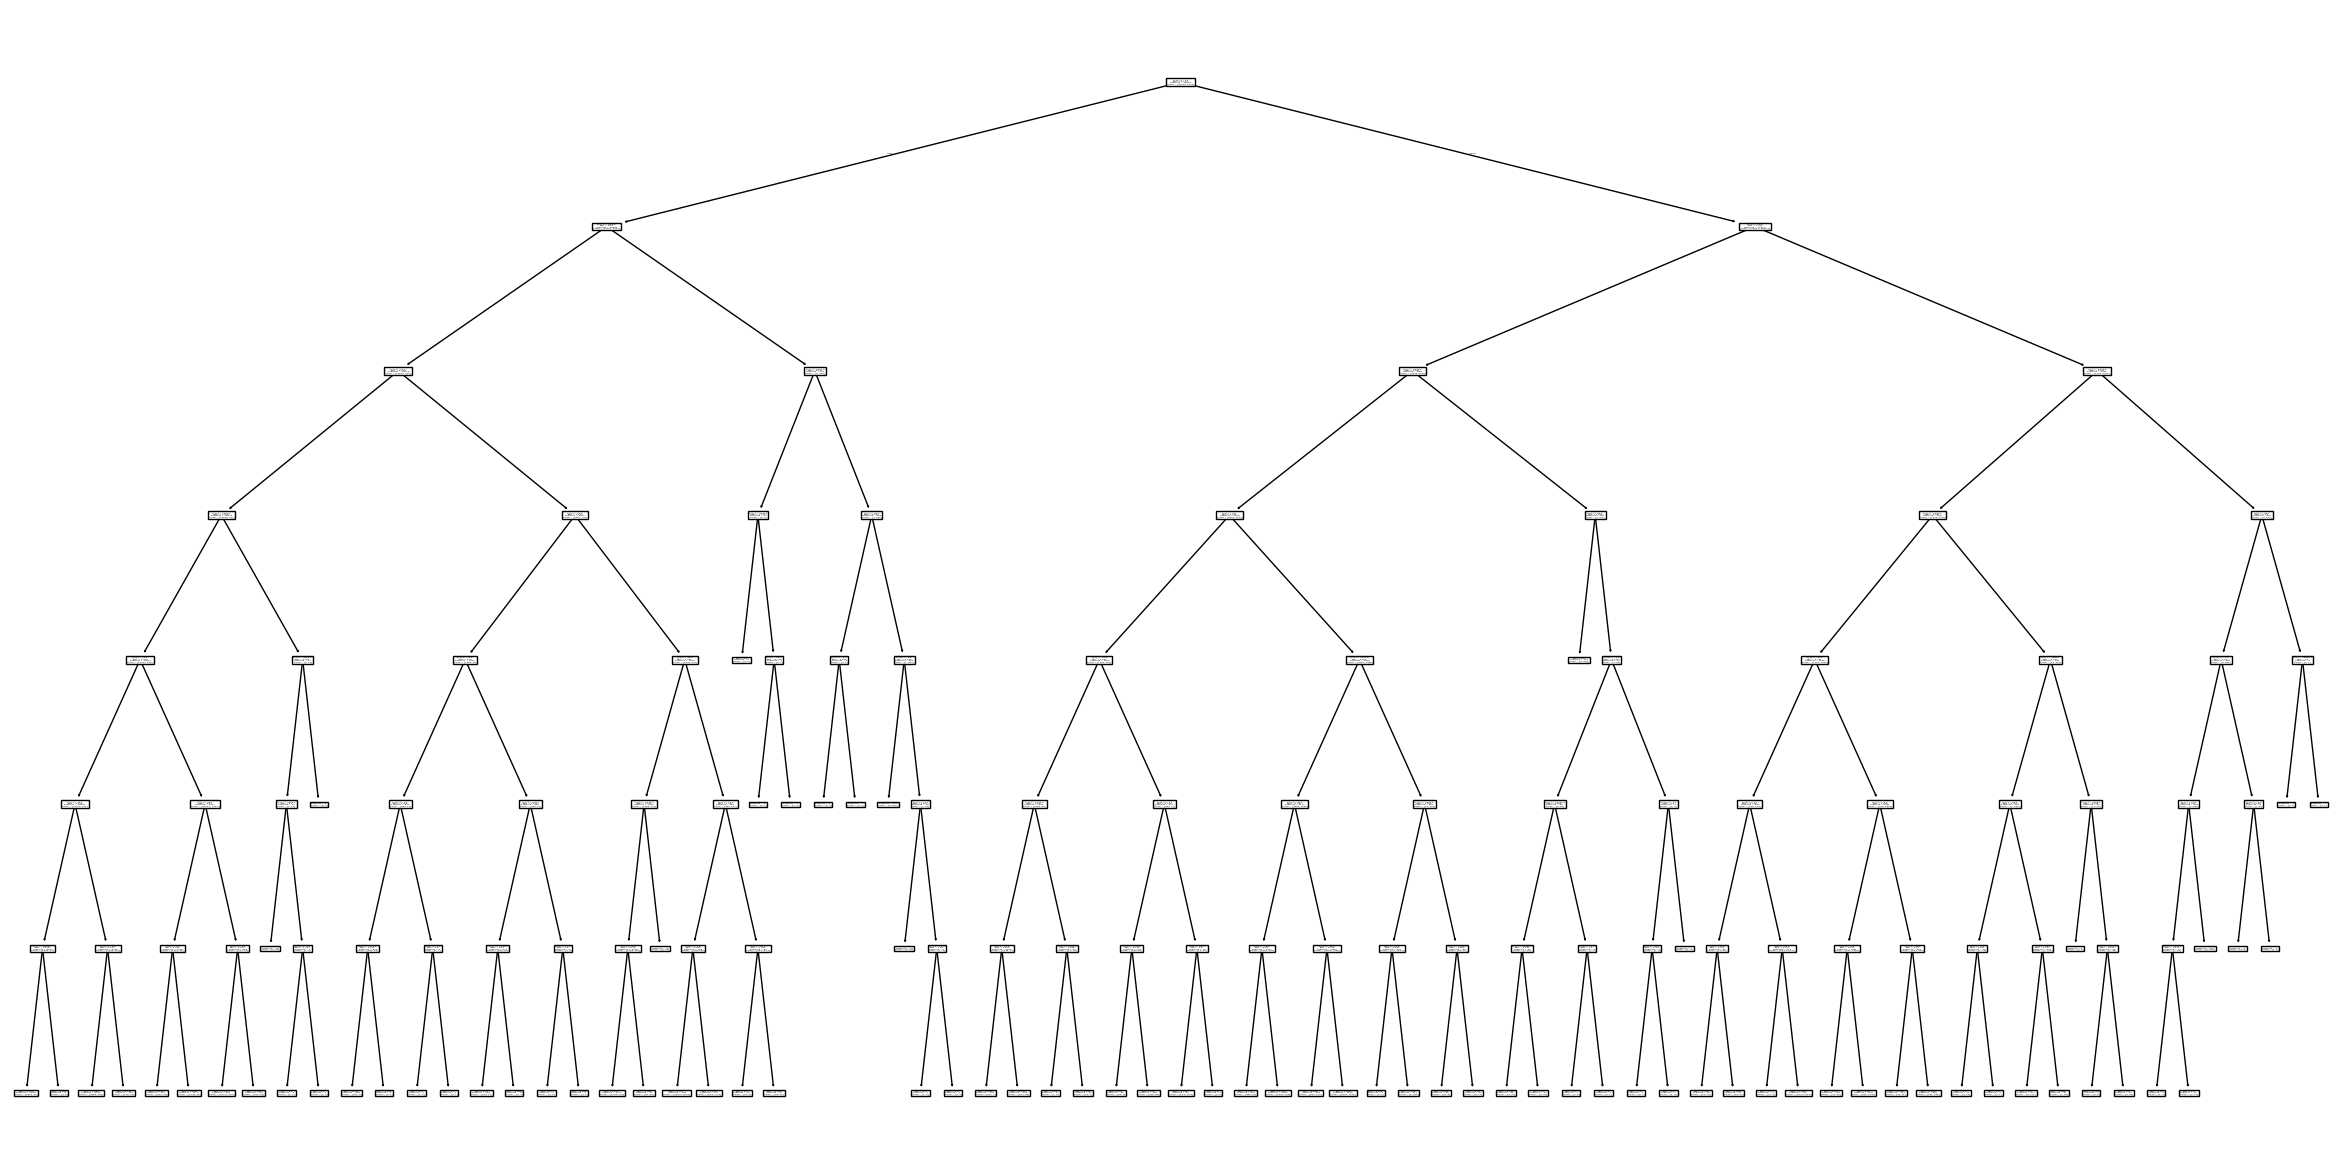

In [46]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,15)) # 그래프 크기 설정
plot_tree(model)
plt.show()

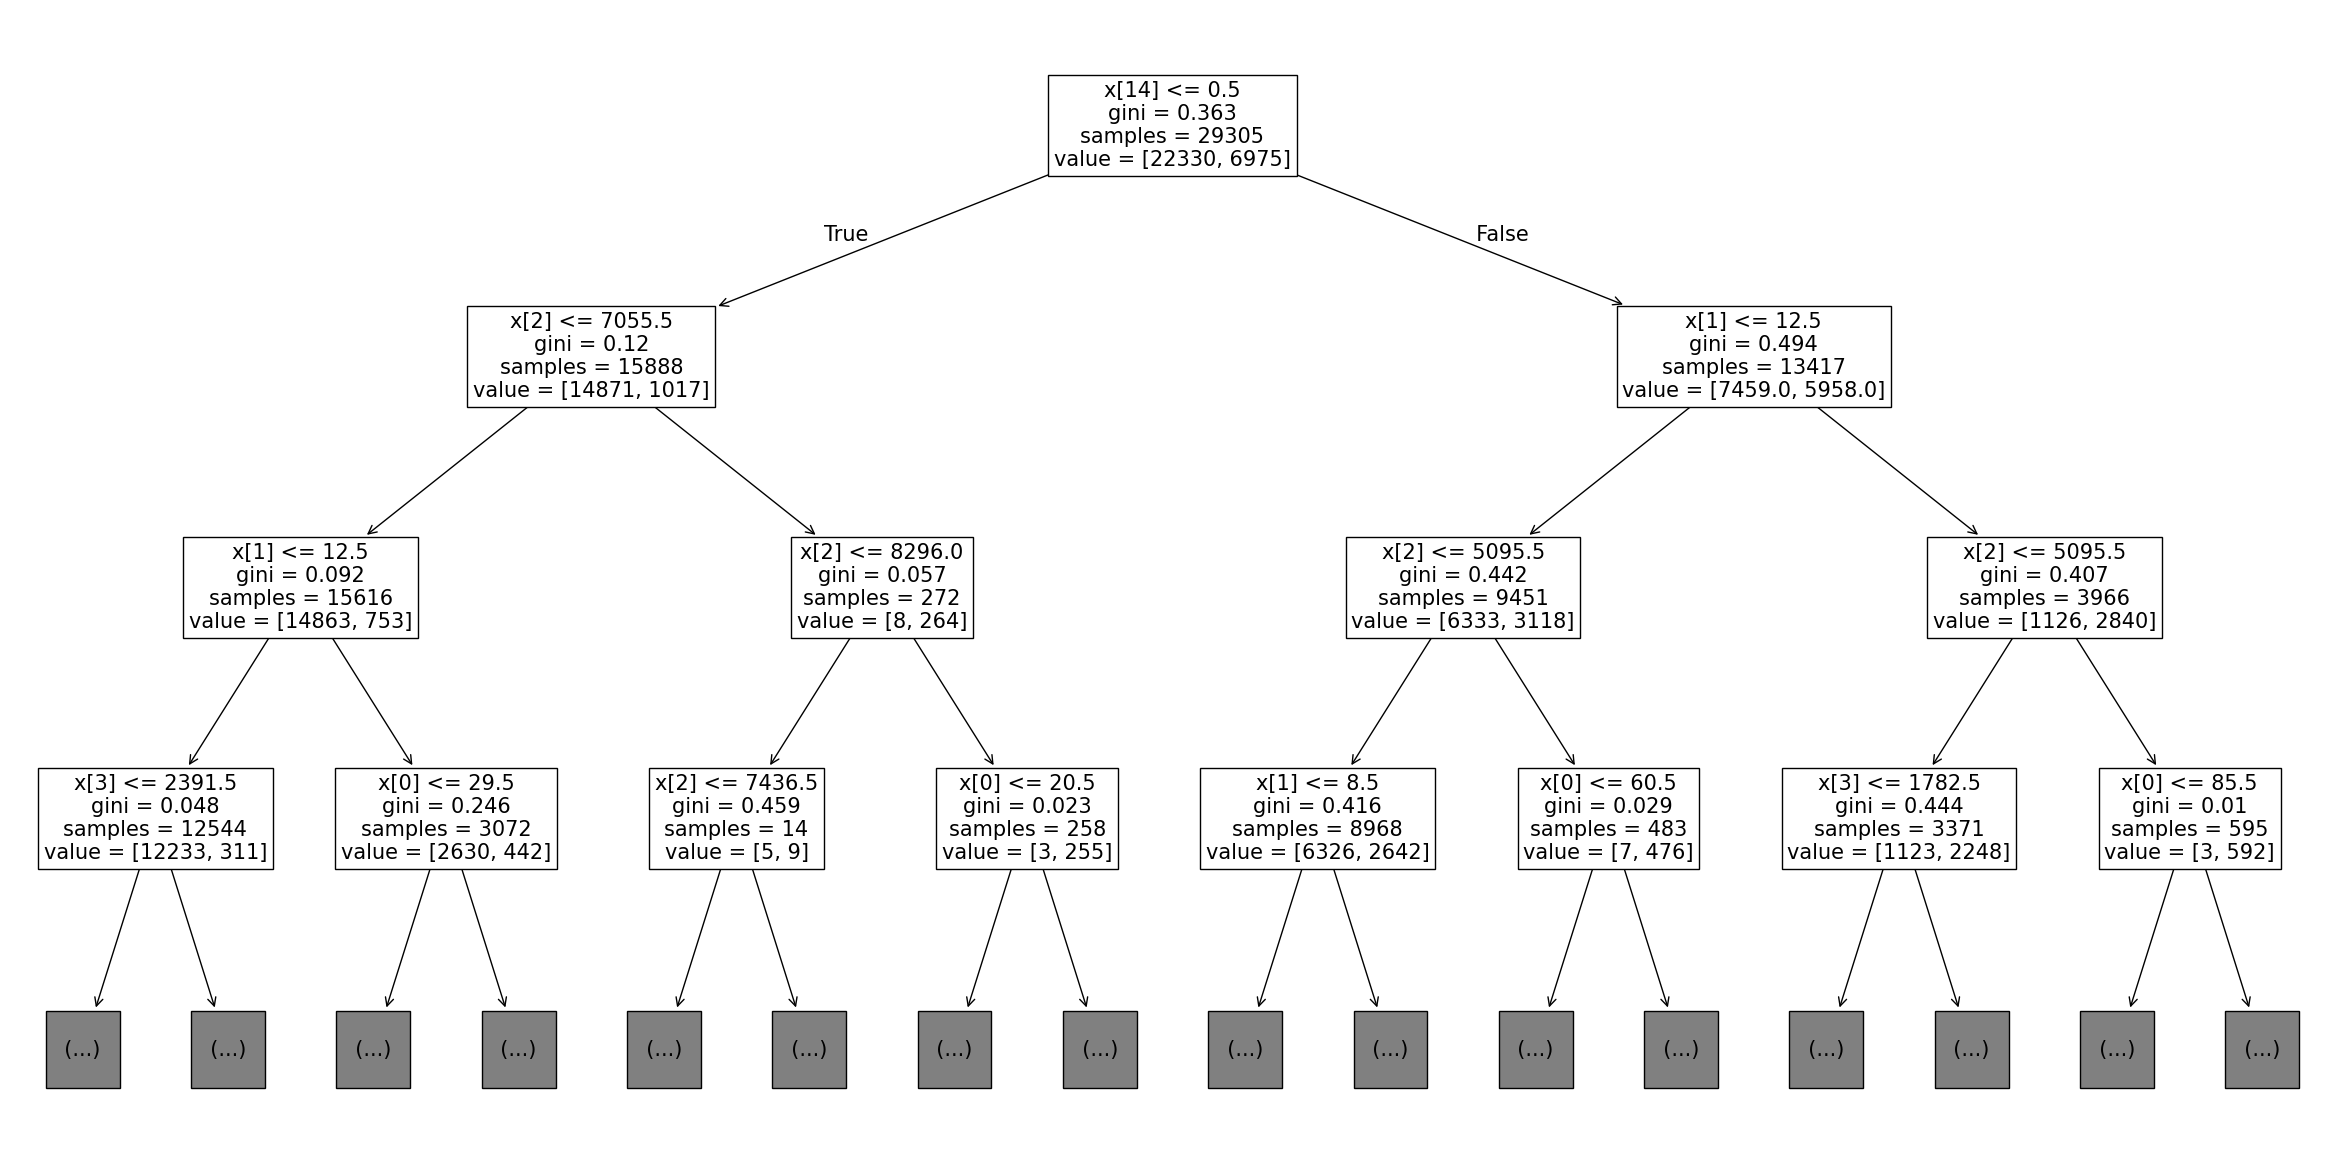

In [47]:
plt.figure(figsize=(30,15))
plot_tree(model, max_depth = 3, fontsize=15)
plt.show()

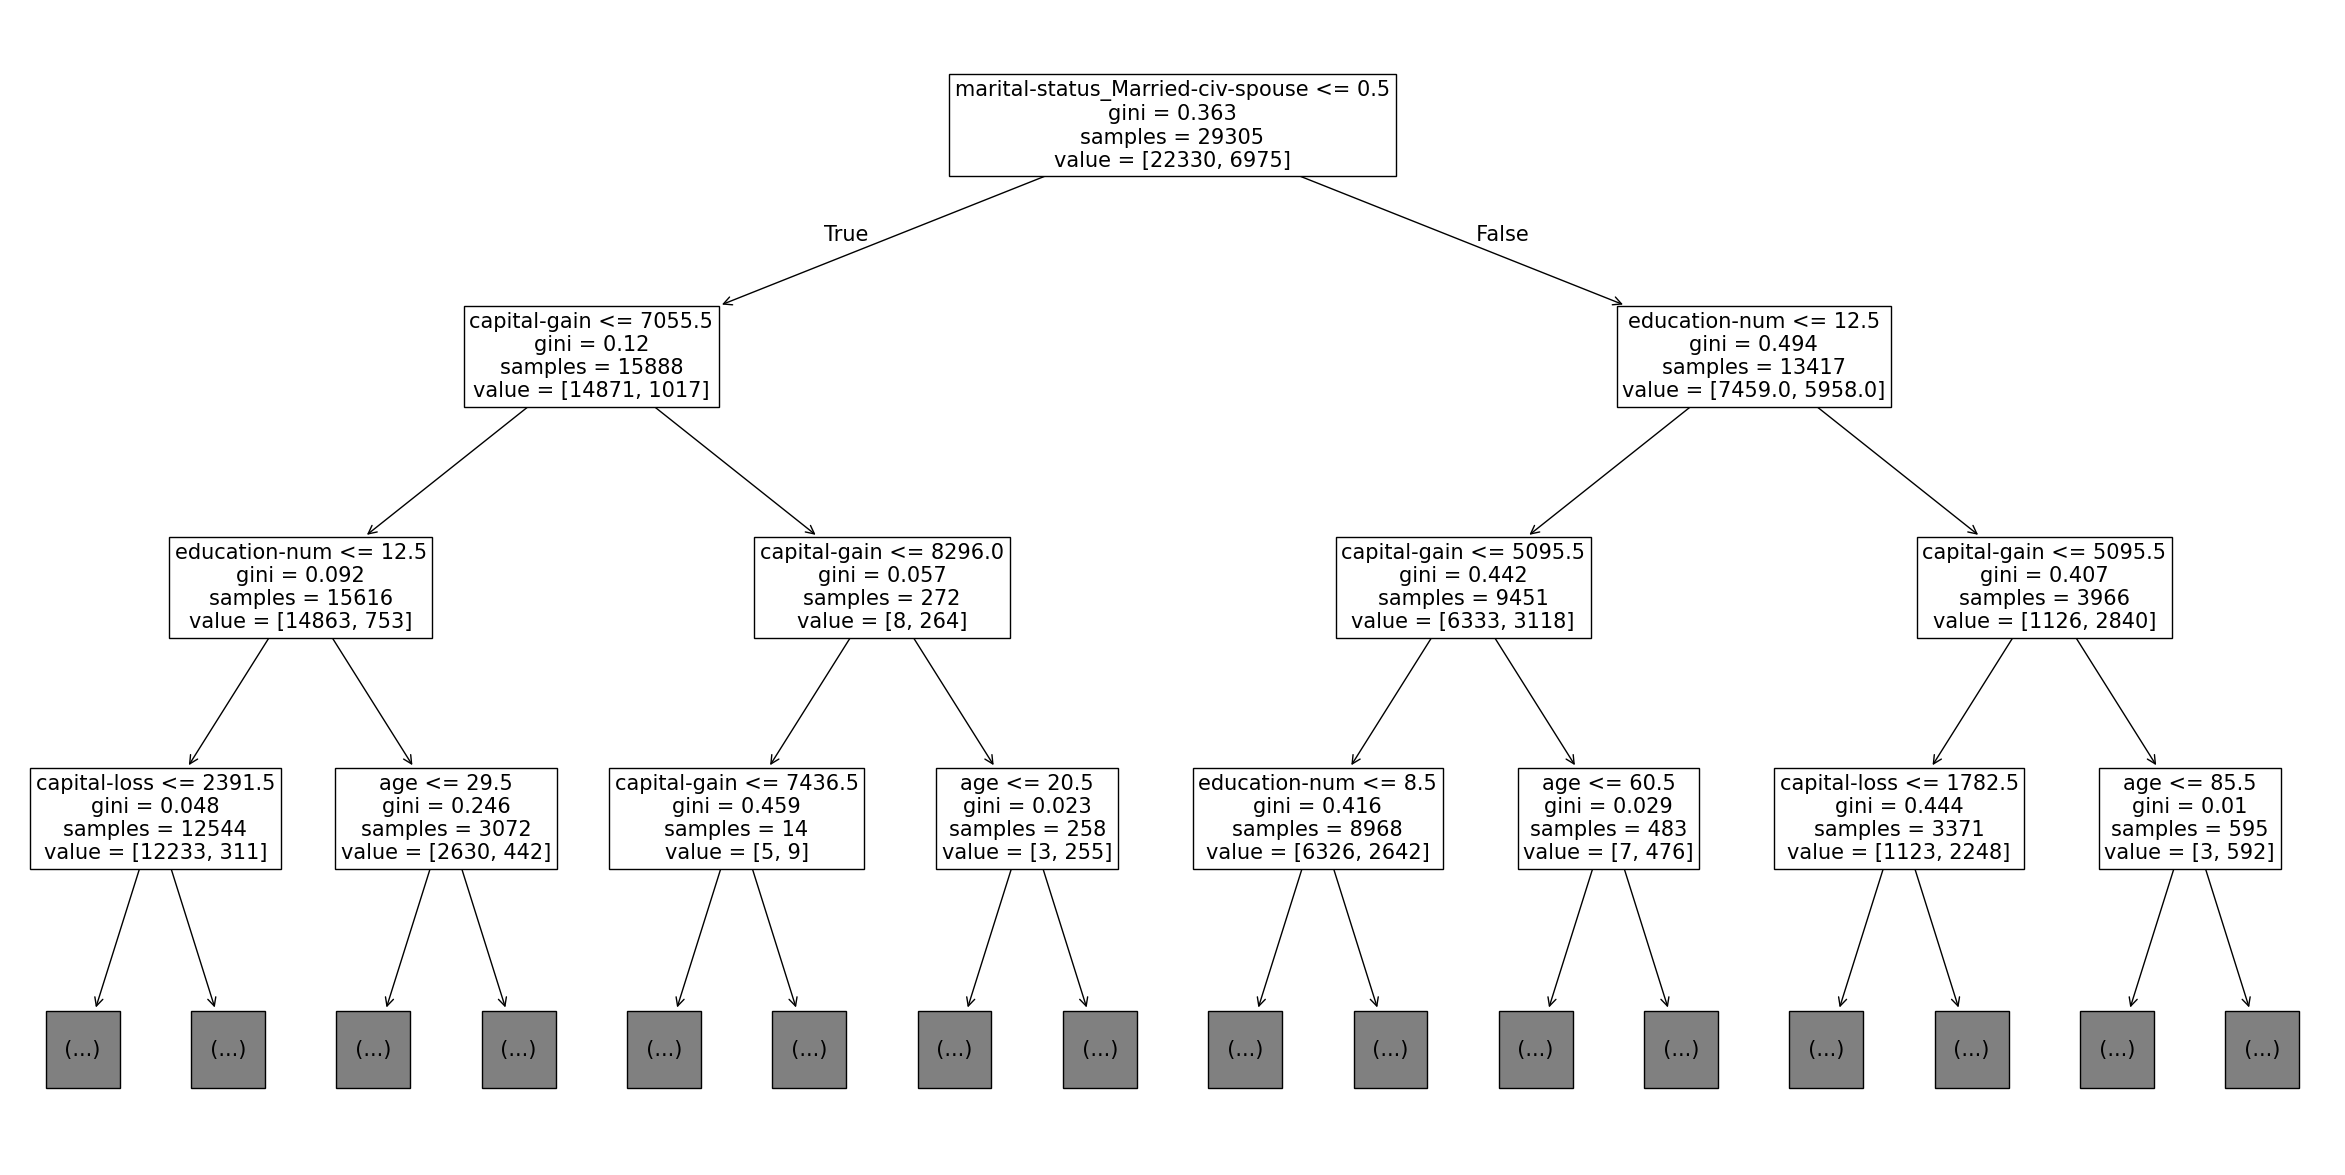

In [48]:
plt.figure(figsize=(30,15))
plot_tree(model, max_depth = 3, fontsize=15, feature_names=X_train.columns) # ❶
plt.show()